# Machine Learning Assignment No 1

## import packages 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

## Read data from csv files

In [2]:
A=pd.read_csv("C:/Users/DELL/Downloads/class.csv")
A.head()

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"


In [3]:
animal=pd.read_csv("C:/Users/DELL/Downloads/animal.csv")
animal.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
# checking info about data sets
animal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal_name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
class_type     101 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
animal.columns

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')

In [6]:
# view the important statistics like mean, standard deviation, minimum and maximum values of the 26 numeric attributes¶
animal.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


## Data Preprocessing 

In [7]:
### check if there are duplicates in animal_name
B1= animal.animal_name.value_counts()
B1
B1[B1 > 1]

frog    2
Name: animal_name, dtype: int64

In [8]:
# observation: find that one frog is venomous and another one is not 
#              change the venomous one into frog1 to seperate 2 kinds of frog 
animal['animal_name'][(animal.venomous == 1 )& (animal.animal_name == 'frog')] = "frog1"

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Merge two files into one file

In [9]:
# Join animal table and class table to show actual class names
test= pd.merge(animal,A,how='left',left_on='class_type',right_on='Class_Number')
test.head(10)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
5,buffalo,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
6,calf,1,0,0,1,0,0,0,1,1,...,0,4,1,1,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
7,carp,0,0,1,0,0,1,0,1,1,...,1,0,1,1,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
8,catfish,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
9,cavy,1,0,0,1,0,0,0,1,1,...,0,4,0,1,0,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


In [10]:
#check unique values presents in data set
print(test.class_type.unique())

[1 4 2 7 6 5 3]


## Data visualization

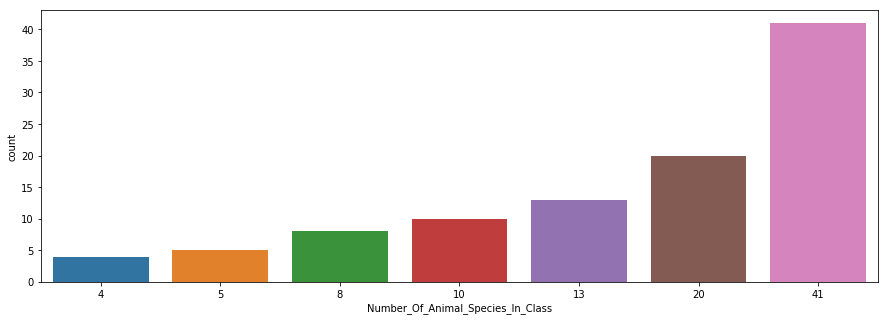

In [11]:
#count of animals based on their Species
plt.subplots(figsize=(15,5))
sb.countplot(test.Number_Of_Animal_Species_In_Class)

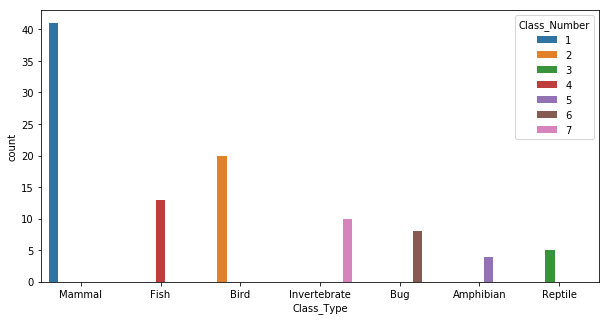

In [12]:
# count of animals based on their class types
sb.countplot(test['Class_Type'],hue=test["Class_Number"])
fig = plt.gcf()
fig.set_size_inches(10,5)



### split train test data into 70/30.

# Linear regression

In [13]:
from sklearn.model_selection import train_test_split
x = animal.iloc[:,1:17]
y = animal.iloc[:,17]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=30)
    
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model1=lm.fit(xtrain,ytrain)
pred=model1.predict(xtest)

from sklearn.metrics import mean_absolute_error
print("MAE for linear model is %2f"%(mean_absolute_error(ytest,pred)))



MAE for linear model is 0.270442


In [14]:
scrs=[]
scr=model1.score(xtrain,ytrain)
scrs.append(scr)

In [15]:
scr

0.98122255711049

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=20)

from statsmodels.api import OLS,add_constant
xconst=add_constant(xtrain)
est=OLS(ytrain,xconst)
est2=est.fit()
print(est2.summary())

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:             class_type   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     222.9
Date:                Wed, 10 Mar 2021   Prob (F-statistic):           4.35e-49
Time:                        18:36:46   Log-Likelihood:                -11.975
No. Observations:                  80   AIC:                             57.95
Df Residuals:                      63   BIC:                             98.45
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3915      0.303     21.123      0.0

In [17]:
    from sklearn import metrics
    print('Mean Absolute Error:',metrics.mean_absolute_error(ytest,pred))
    print('Mean Squared Error:',metrics.mean_squared_error(ytest,pred))
    print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(ytest,pred)))

Mean Absolute Error: 2.1010472921265624
Mean Squared Error: 7.074629561845486
Root Mean Squared Error: 2.659817580558014


# Logistics Regression

In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.20,random_state=20)
    
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model5 = lr.fit(xtrain,ytrain)
pred = model5.predict(xtest)

from sklearn.metrics import confusion_matrix,accuracy_score
cnf_matrix=(confusion_matrix(ytest,pred))
cnf_matrix
print(accuracy_score(ytest,pred))
print(confusion_matrix(ytest,pred))


1.0
[[7 0 0 0 0 0]
 [0 4 0 0 0 0]
 [0 0 5 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 2]]


In [19]:
scr1=model5.score(xtrain,ytrain)
scrs.append(scr1)

In [20]:
scr1

0.9875

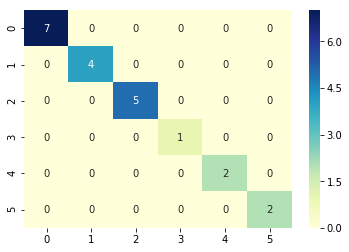

In [21]:
sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

# Decision tree

In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=30)

from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(criterion='entropy',random_state=20,max_depth=3)
model2=dc.fit(xtrain,ytrain)
pred=model2.predict(xtest)

from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest,pred)*100

from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(ytest,pred)
accuracy_score(ytest,pred)*100

90.47619047619048

In [23]:
scr2=model2.score(xtrain,ytrain)
scrs.append(scr2)

In [24]:
scr2

0.8625

# Random forest

In [25]:
from sklearn.model_selection import train_test_split
x = animal.iloc[:,1:17]
y = animal.iloc[:,17]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=20)
    
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(random_state=20,max_leaf_nodes=8,criterion='entropy')
model4=rfc.fit(xtrain,ytrain)
pred=model4.predict(xtest)
from sklearn.metrics import accuracy_score
print("accuracy is %f"%(accuracy_score(ytest,pred)*100))
    

accuracy is 95.238095


In [26]:
scr3=model4.score(xtrain,ytrain)
scrs.append(scr3)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
model=knn.fit(xtrain,ytrain)
pred=model.predict(xtest)
scr4=model.score(xtrain,ytrain)
scrs.append(scr4)

In [28]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(confusion_matrix(ytest,pred))

[[10  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  1  0  1  0  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  1]]


In [29]:
print(classification_report(ytest,pred))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        10
          2       1.00      1.00      1.00         3
          3       0.00      0.00      0.00         0
          4       1.00      1.00      1.00         4
          5       1.00      0.50      0.67         2
          6       1.00      1.00      1.00         1
          7       1.00      1.00      1.00         1

avg / total       1.00      0.95      0.97        21



C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [33]:
scrs

[0.98122255711049, 0.9875, 0.8625, 1.0, 1.0]

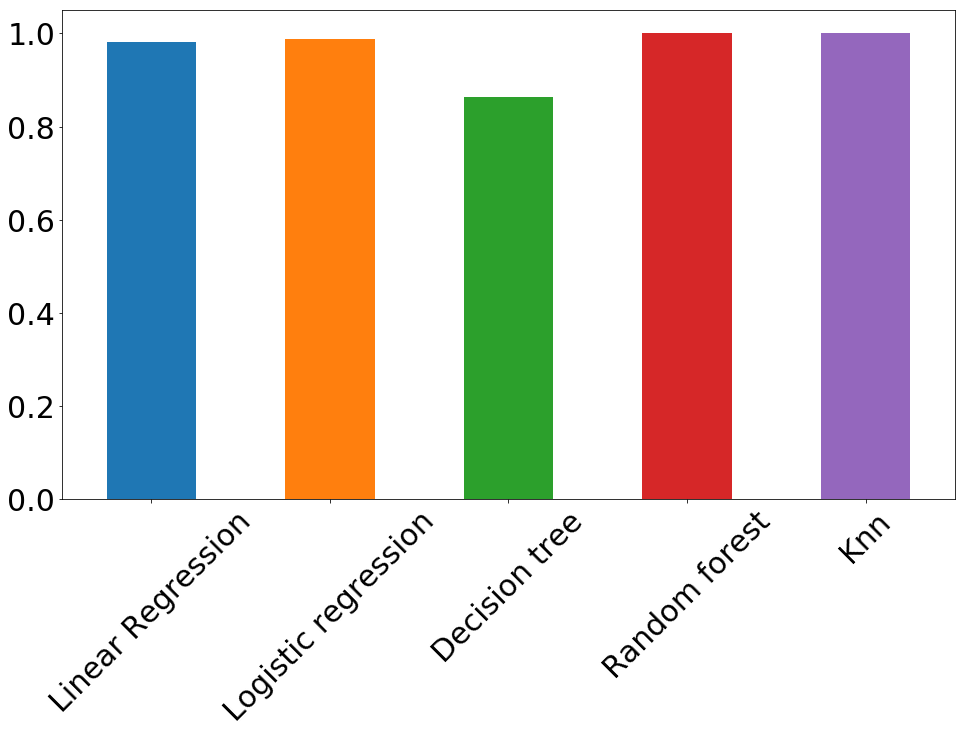

In [32]:
# Convert the Accuracy Scores into one-dimensional 1darray with corresponding classifier names as axis labels
Accuracy = pd.Series(scrs, ['Linear Regression','Logistic regression','Decision tree', 'Random forest','Knn'])
current_palette = sb.color_palette("muted", n_colors=5)
# Make the bar Plot 
Accuracy.plot(x='Classifiers', y='Accuracy scores',kind = 'bar',figsize=(16,9), rot=45, fontsize=30,)
#plt.bar(fscores,clfs)
plt.show()

# Result

#### Random Forest model wins with a 1.0 accuracy score and 0.96 of cross validation.